In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
data_file = 'top_1000_by_liquidity.csv'

dataset_full = pd.read_csv(data_file)

In [3]:
dataset_full.columns

Index(['id', 'reserve0', 'reserve1', 'totalSupply', 'reserveUSD', 'reserveETH',
       'volumeToken0', 'volumeToken1', 'txCount', 'createdAtTimestamp',
       'createdAtBlockNumber', 'token0.id', 'token0.symbol', 'token0.name',
       'token0.txCount', 'token0.tradeVolume', 'token0.totalLiquidity',
       'token0.decimals', 'token1.id', 'token1.symbol', 'token1.name',
       'token1.txCount', 'token1.tradeVolume', 'token1.totalLiquidity',
       'token1.decimals'],
      dtype='object')

In [4]:
dataset_cropped = dataset_full[['token0.symbol', 'token1.symbol', 'reserveUSD']]

In [5]:
dataset_cropped

,token0.symbol,token1.symbol,reserveUSD
0,UETH,ULCK,1.743372e+09
1,WISE,WETH,1.160742e+08
2,USDC,WETH,9.728135e+07
3,DAI,USDC,3.533727e+07
4,WETH,USDT,3.524678e+07
...,...,...,...
995,API3,WETH,1.289500e+05
996,PATH,WETH,1.285439e+05
997,FARM,WETH,1.285344e+05
998,WETH,CURRY,1.284891e+05


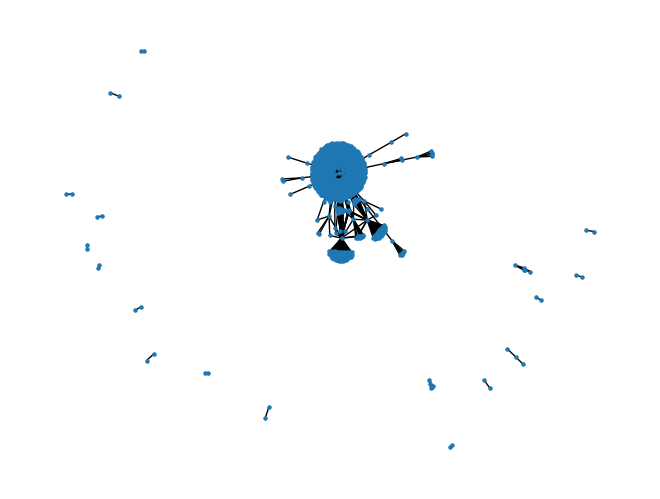

In [7]:
Graphtype = nx.Graph()
network = nx.from_pandas_edgelist(dataset_cropped, source= 'token0.symbol',  target='token1.symbol', edge_attr='reserveUSD', create_using=Graphtype)
nx.draw_spring(network, with_labels=False, node_size=5, width=1)